# CRIME PREDICTION

In [1]:
#importing libraries
import os
import pandas as pd
import numpy as np
import xlrd

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [2]:
from ipywidgets import Button
from tkinter import Tk, filedialog
from IPython.display import clear_output, display

def select_files(b):
    clear_output()
    root = Tk()
    root.withdraw() # Hide the main window.
    root.call('wm', 'attributes', '.', '-topmost', True) # Raise the root to the top of all windows.
    b.files = filedialog.askopenfilename(multiple=True) # List of selected files will be set button's file attribute.
    print(b.files) # Print the list of files selected.

fileselect = Button(description="File select")
fileselect.on_click(select_files)

display(fileselect)

Button(description='File select', style=ButtonStyle())

In [4]:
#printing the first five rows
import ipywidgets as widgets
butt = Button(description='PREDICT')
outt = widgets.Output()
def on_butt_clicked(b):
    with outt:
        clear_output()
    

butt.on_click(on_butt_clicked)
widgets.VBox([butt,outt])



In [3]:
#importing the dataset
data=pd.read_excel("dataset1.xlsx")

In [4]:
#checking the dataset
data.shape

(499, 13)

In [5]:
#printing the first five rows
data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59:00,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,2016-05-01 00:00:00,23:50:00,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,2016-01-01 00:00:00,00:30:00,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [6]:
#printing the columns of the dataset
print(data.columns)

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'],
      dtype='object')


In [7]:
#checking for null value
data.isnull().sum()

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          1
Time          0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
dtype: int64

In [8]:
#removing the dirty data from datasets
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
dtype: int64

In [10]:
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
#plotting bar graph of how many crimes occuer how much time
fig = plt.figure(figsize=(20,10))
ax=data['Category'].value_counts().plot(kind='bar',title='Number of Crimes in San Francisco',fontsize=12)
ax.set_xlabel('Crimes')
ax.set_ylabel('No of Occurence')
plt.show()

NameError: name 'plt' is not defined

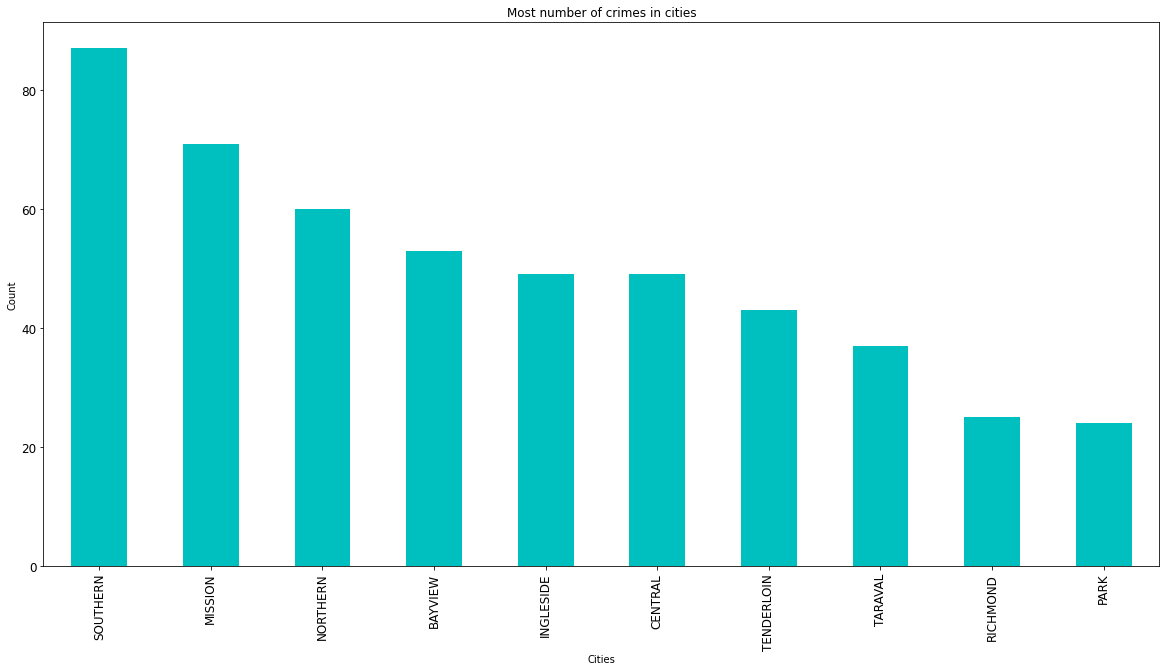

In [12]:
#plotting bar graph of most number of crimes in cities
fig = plt.figure(figsize=(20,10))
ax=data['PdDistrict'].value_counts().plot(kind='bar',title='Most number of crimes in cities',color='c',fontsize=12)
ax.set_xlabel('Cities')
ax.set_ylabel('Count')
plt.show()

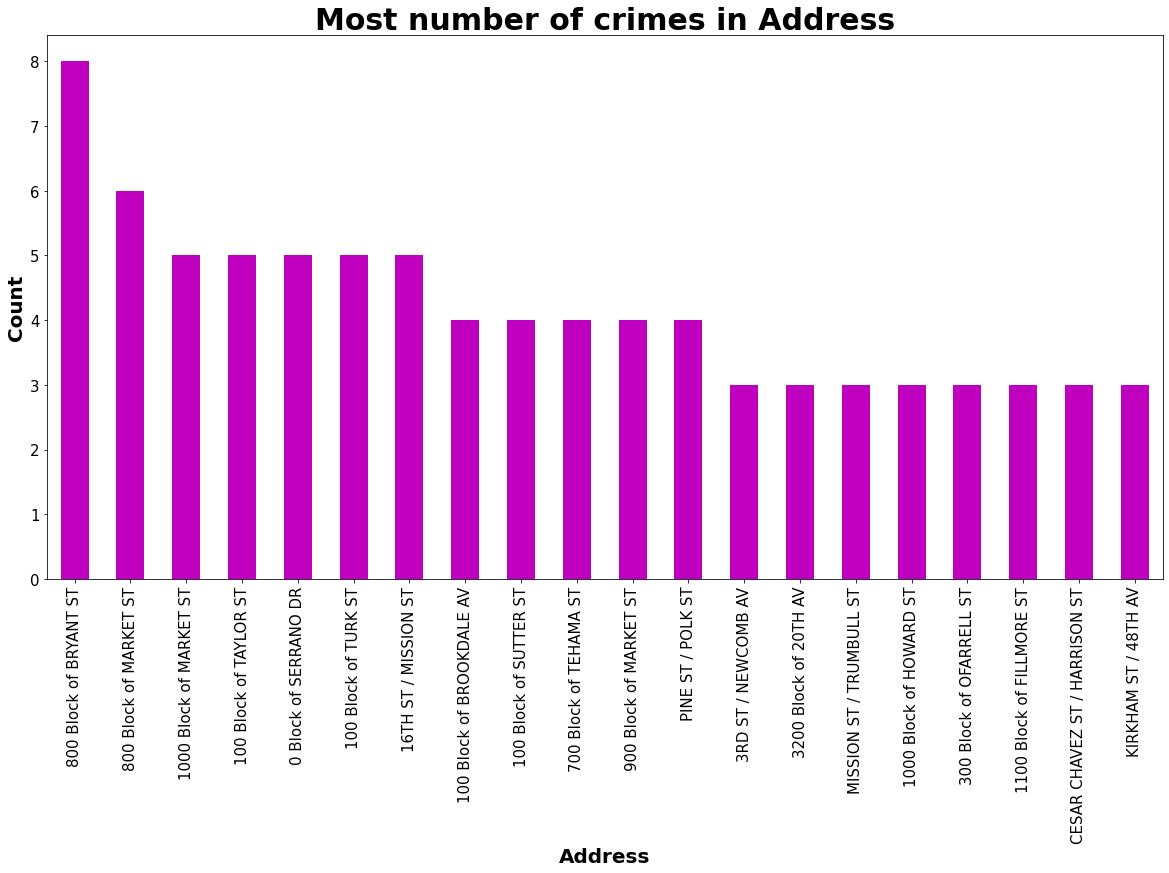

In [13]:
#Regions with Crime of first 20 Address with most crimes
fig = plt.figure(figsize=(20,10))
plt.title('Most number of crimes in Address',fontsize=30,fontweight='bold')
ax=data['Address'].value_counts().head(20).plot(kind='bar',color='m',fontsize=15)
ax.set_xlabel('Address',fontweight='bold',fontsize=20)
ax.set_ylabel('Count',fontweight='bold',fontsize=20)
plt.show()

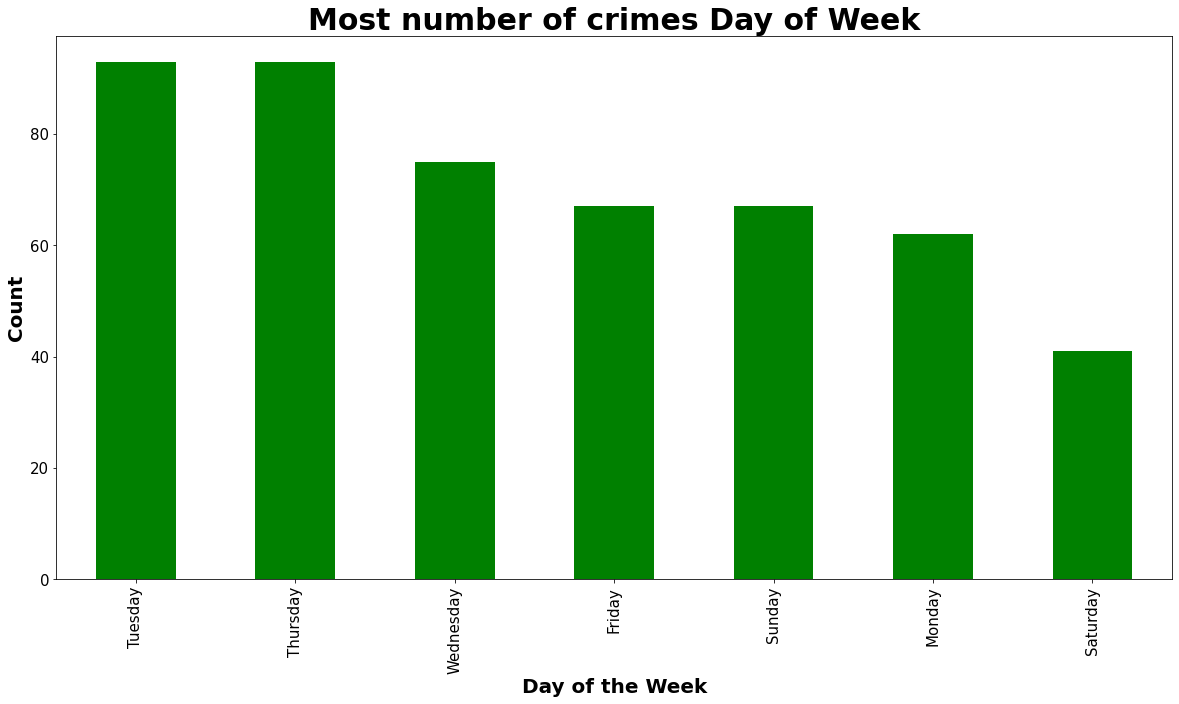

In [14]:
#Regions with Crime of first 20 Address with most crimes
fig = plt.figure(figsize=(20,10))
plt.title('Most number of crimes Day of Week',fontsize=30,fontweight='bold')
ax=data['DayOfWeek'].value_counts().head(20).plot(kind='bar',color='g',fontsize=15)
ax.set_xlabel('Day of the Week',fontweight='bold',fontsize=20)
ax.set_ylabel('Count',fontweight='bold',fontsize=20)
plt.show()

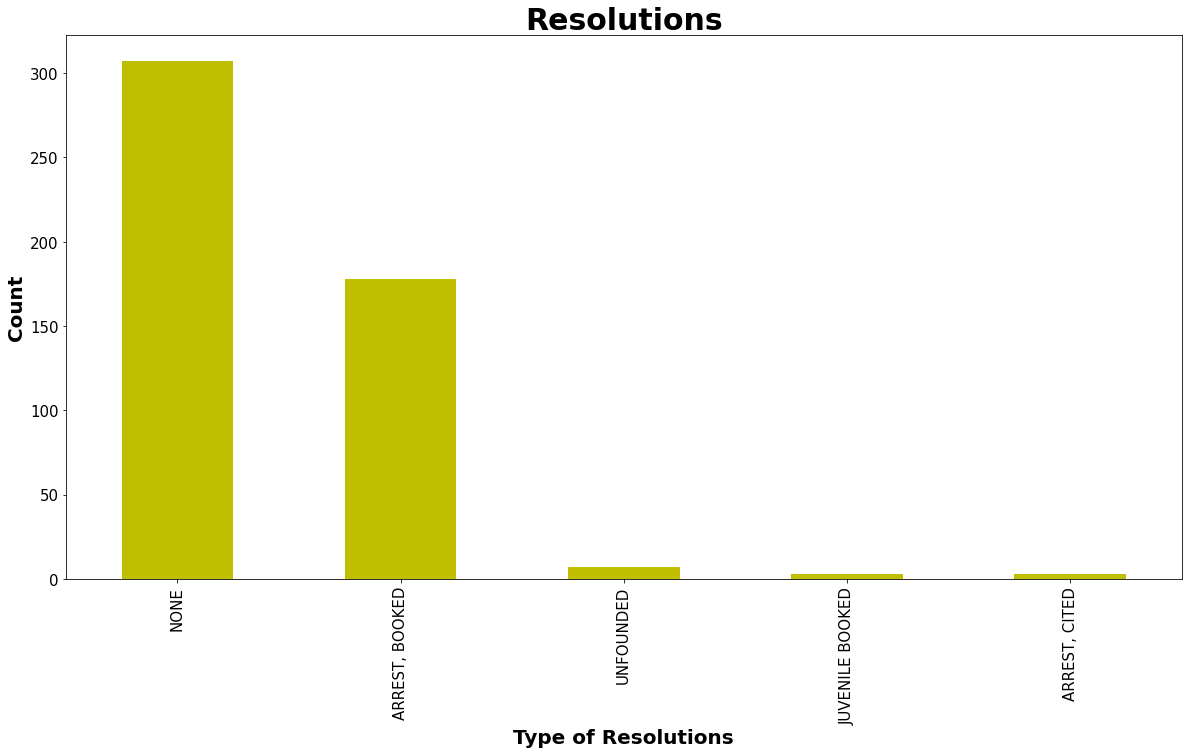

In [15]:
#Resolutions
fig = plt.figure(figsize=(20,10))
plt.title('Resolutions',fontsize=30,fontweight='bold')
ax=data['Resolution'].value_counts().plot(kind='bar',color='y',fontsize=15)
ax.set_xlabel('Type of Resolutions',fontweight='bold',fontsize=20)
ax.set_ylabel('Count',fontweight='bold',fontsize=20)
plt.show()


In [16]:
data['Resolution'].unique()

array(['ARREST, BOOKED', 'NONE', 'JUVENILE BOOKED', 'ARREST, CITED',
       'UNFOUNDED'], dtype=object)

In [17]:
data['Date']=pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month

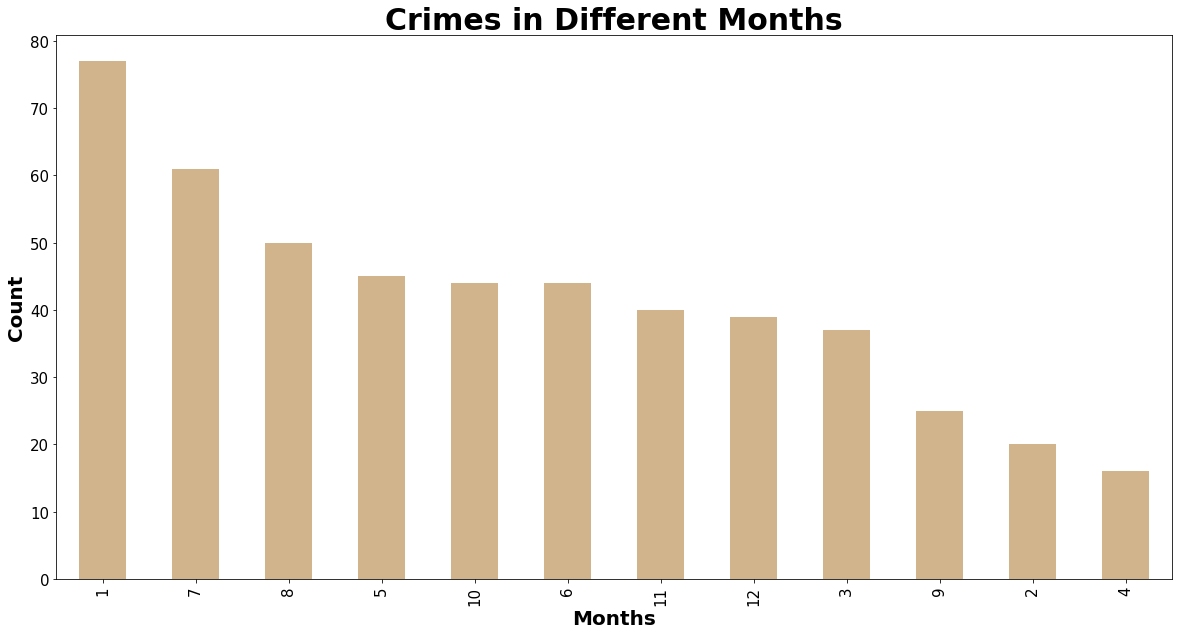

In [18]:
fig = plt.figure(figsize=(20,10))
plt.title('Crimes in Different Months',fontsize=30,fontweight='bold')
ax=data['Month'].value_counts().plot(kind='bar',color='tan',fontsize=15)
ax.set_xlabel('Months',fontweight='bold',fontsize=20)
ax.set_ylabel('Count',fontweight='bold',fontsize=20)
plt.show()


In [19]:
#considering lattitudes 
x1=data['Y']
y1=data['X']

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [21]:
data = np.array(list(zip(x1, y1))).reshape(len(x1), 2)

In [22]:
data

array([[  37.77542071, -122.40340479],
       [  37.77542071, -122.40340479],
       [  37.72998097, -122.3888562 ],
       [  37.78578838, -122.41297054],
       [  37.76505012, -122.41967178],
       [  37.78801856, -122.42607718],
       [  37.78087894, -122.40572145],
       [  37.78398056, -122.4117783 ],
       [  37.77578762, -122.39335724],
       [  37.72096696, -122.38718164],
       [  37.76447816, -122.47737652],
       [  37.74573894, -122.47796033],
       [  37.73569703, -122.37675766],
       [  37.72927052, -122.43232587],
       [  37.79164298, -122.4009087 ],
       [  37.78370693, -122.40859511],
       [  37.75728959, -122.4068704 ],
       [  37.74890631, -122.42035478],
       [  37.71576543, -122.43990977],
       [  37.78356994, -122.40842112],
       [  37.77361863, -122.42231567],
       [  37.79284128, -122.42451984],
       [  37.75409869, -122.41423385],
       [  37.75409869, -122.41423385],
       [  37.771494  , -122.50775013],
       [  37.7183022 , -1

In [23]:
#for k in cl:
kmean=KMeans(n_clusters=3)
kmean.fit(data)

KMeans(n_clusters=3)

In [24]:
kmean.cluster_centers_

array([[  37.78221551, -122.41372432],
       [  37.73640577, -122.41112983],
       [  37.75495375, -122.46937141]])

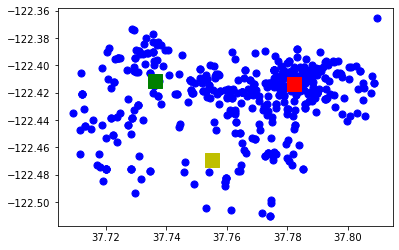

In [25]:
plt.scatter(x1, y1, s =50, c='b')
plt.scatter(37.73640577, -122.41112983, s=200, c='g', marker='s')
plt.scatter(37.78221551, -122.41372432, s=200, c='r', marker='s')
plt.scatter(37.75495375, -122.46937141, s=200, c='y', marker='s')
plt.show()